# Кластерный анализ

### Задачи

1. **Осуществить классификацию наблюдений с использованием алгоритма кластерного анализа («k-средних»). Количество классов задать равным четырём.**
2. **Пронумеровать полученные классы в соответствии со средним значением интегрального показателя кредитоспособности для наблюдений отдельного класса: классу с наиболее высоким уровнем кредитоспособности соответствует более высокое среднее значение интегрального показателя кредитоспособности.**

In [1]:
import sys
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import warnings

sys.path.append('../src')
warnings.filterwarnings('ignore')

from cluster_analysis_utils import elbow_method, silhouette_coeff_method, relabel_clusters_by_indicator
from visualization import elbow_method_plot, silhouette_plot, silhouette_mean_plot

In [2]:
file_path = '../data/data_with_I.csv'
df = pd.read_csv(file_path)

display(df)

,I,F1,F2,F3,F4,F5,k1,k2,k4,k5,k6,k7,k9,k10,k11,k13,k14,k15,k18,k19
0,-0.158751,-0.314829,0.829452,-1.069358,-0.026382,-0.460131,0.000000,0.014084,0.000000,0.797945,0.449936,0.000000,1.000000,0.000000,0.012880,0.062375,0.383869,0.795137,0.002558,0.002752
1,0.423813,1.042911,1.147481,-0.177917,0.021606,0.080521,0.245124,0.299176,0.558148,0.910623,0.264507,1.000000,1.000000,0.000000,0.028820,0.082380,1.000000,1.000000,0.003869,0.002987
2,-0.333018,-0.612924,1.103026,-0.856950,-0.730159,-1.320378,0.000000,0.000000,0.000000,0.764261,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000528
3,0.801346,2.530072,-0.508093,1.008972,0.124333,0.568267,0.809119,0.453227,0.853955,0.940561,0.899900,0.962963,1.000000,0.339213,0.024809,0.714604,1.000000,1.000000,0.005724,0.011632
4,-0.167511,0.808507,0.459595,-1.647264,-0.807870,-1.351857,0.194844,0.000000,0.444533,0.864509,0.000000,0.000000,1.000000,0.007876,0.000000,0.000000,0.514314,0.625071,0.002160,0.001286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2690,0.334152,0.772825,-0.263806,0.868460,1.244943,-0.826719,0.323204,0.142995,0.397917,0.757061,0.041652,0.874880,0.795362,0.355109,0.051856,0.419410,0.829911,1.000000,0.004824,0.011298
2691,0.330281,-0.115035,1.252717,0.646925,0.524918,0.389984,0.143047,0.151816,0.157581,0.830148,0.354400,1.000000,1.000000,0.006451,0.066174,0.380569,1.000000,1.000000,0.001887,0.004243
2692,0.173085,-0.099070,0.455273,1.861309,0.615917,-1.803509,0.113393,0.000000,0.190636,0.808592,0.000000,0.000000,0.836614,0.050279,0.045358,0.714604,1.000000,1.000000,0.002285,0.009967
2693,0.182451,-0.811812,1.148944,0.794026,0.600394,0.612646,0.077662,0.000000,0.000000,0.748261,0.494889,0.907597,0.868915,0.033910,0.074567,0.439297,0.944861,1.000000,0.001407,0.003355


In [3]:
X = df.iloc[:, -14:].values

## Определение наилучшего числа кластеров

### Метод локтя

**Метод основан на визуальном анализе графика зависимости внутрикластерной дисперсии от количества кластеров: точка, после которой снижение ошибки замедляется (излом), считается «локтем» и оптимальным числом групп.**

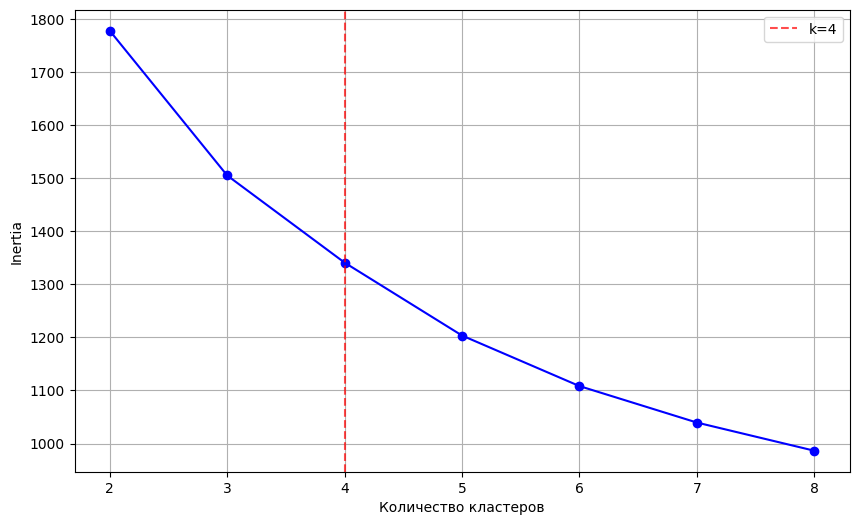

In [4]:
k_range = range(2, 9)
inertia = elbow_method(X, k_range)
elbow_method_plot(k_range, inertia)

**На основе данного графика нельзя определить, использование скольких кластеров будет являться оптимальным.**

## Метод силуэта

**Коэффициент «силуэт» вычисляется с помощью среднего внутрикластерного расстояния (a) и среднего расстояния до ближайшего кластера (b) по каждому образцу. Силуэт вычисляется как (b - a) / max(a, b).**

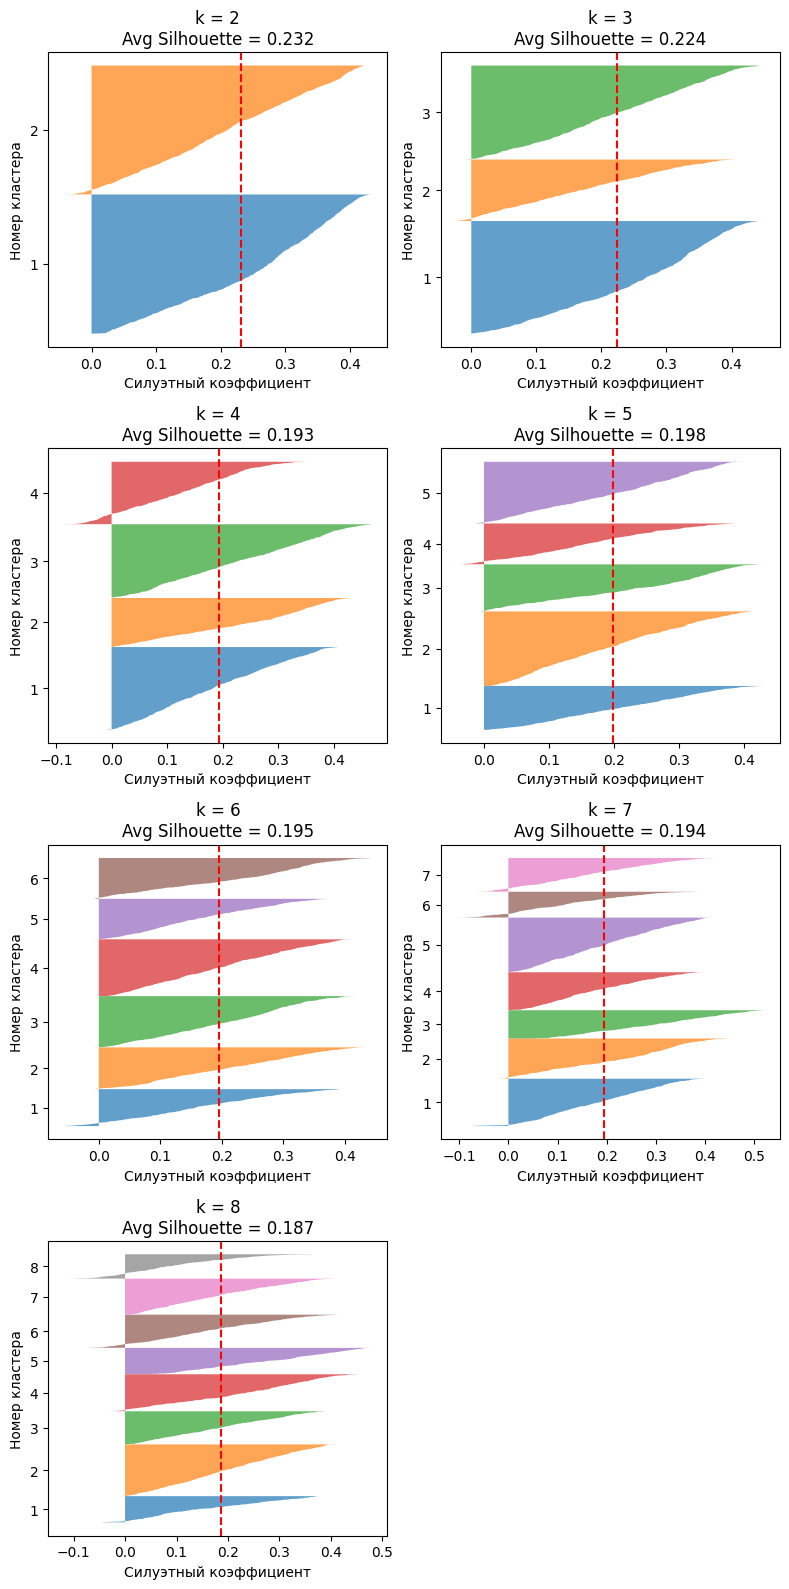

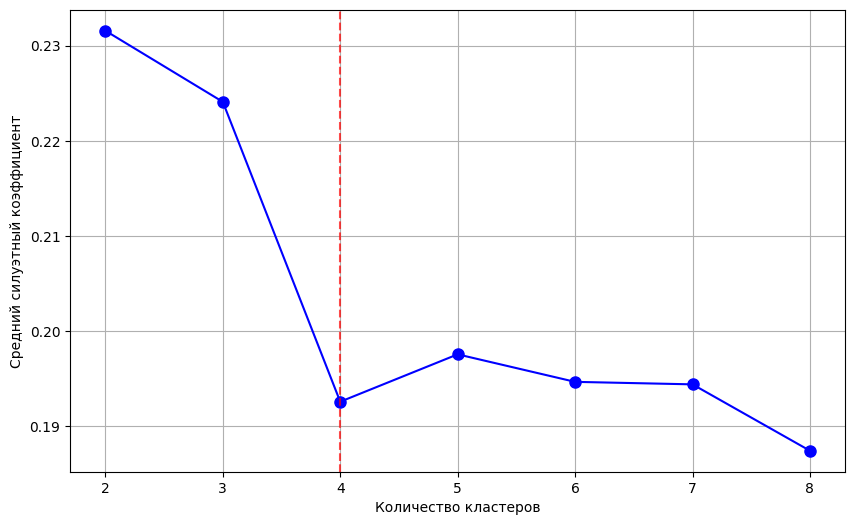

In [5]:
silhouette_results = silhouette_coeff_method(X, k_range)

silhouette_plot(X, silhouette_results)
silhouette_mean_plot(silhouette_results)

**Анализ среднего значения силуэтного коэффициента показал, что его максимальное значение достигается при двух кластерах.**

**В то же время, в соответствии с условиями лабораторной работы, количество кластеров фиксировано и равно четырём.**

**Таким образом, метод силуэта используется в данной работе в качестве диагностического инструмента, а окончательный выбор числа кластеров определяется заданием и экономической интерпретируемостью результатов.**

## k-means

In [6]:
kmeans = KMeans(
    n_clusters=4,
    init='random',
    n_init='auto'
)
kmeans.fit(X)
print(f"Сошлось за {kmeans.n_iter_} итераций")
print(f"Inertia: {kmeans.inertia_:.2f}")

Сошлось за 9 итераций
Inertia: 1342.48


### Координаты центров полученных кластеров

In [7]:
centers = pd.DataFrame(
    kmeans.cluster_centers_.T,
    index=df.iloc[:, -14:].columns,
    columns=[1, 2, 3, 4]
)
display(centers.round(4))

,1,2,3,4
k1,0.0691,0.1607,0.1342,0.6075
k2,0.0519,0.1032,0.0486,0.3445
k4,0.0391,0.0990,0.1057,0.5932
k5,0.4657,0.6451,0.6995,0.8677
k6,0.3316,0.6825,0.1647,0.4797
k7,0.4685,0.8783,0.1918,0.8795
k9,0.2247,0.8066,0.8658,0.9815
k10,0.4621,0.2500,0.1407,0.2684
k11,0.0330,0.0392,0.0307,0.0367
k13,0.2544,0.3619,0.1617,0.3348


**Ниже производится перенумерация кластеров в порядке убывания**

In [8]:
df['Cluster'] = kmeans.labels_
df['Cluster'] = relabel_clusters_by_indicator(df, 'Cluster', 'I')
df.head(10)

,I,F1,F2,F3,F4,F5,k1,k2,k4,k5,...,k7,k9,k10,k11,k13,k14,k15,k18,k19,Cluster
0,-0.158751,-0.314829,0.829452,-1.069358,-0.026382,-0.460131,0.000000,0.014084,0.000000,0.797945,...,0.000000,1.000000,0.000000,0.012880,0.062375,0.383869,0.795137,0.002558,0.002752,3
1,0.423813,1.042911,1.147481,-0.177917,0.021606,0.080521,0.245124,0.299176,0.558148,0.910623,...,1.000000,1.000000,0.000000,0.028820,0.082380,1.000000,1.000000,0.003869,0.002987,1
2,-0.333018,-0.612924,1.103026,-0.856950,-0.730159,-1.320378,0.000000,0.000000,0.000000,0.764261,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000528,3
3,0.801346,2.530072,-0.508093,1.008972,0.124333,0.568267,0.809119,0.453227,0.853955,0.940561,...,0.962963,1.000000,0.339213,0.024809,0.714604,1.000000,1.000000,0.005724,0.011632,1
4,-0.167511,0.808507,0.459595,-1.647264,-0.807870,-1.351857,0.194844,0.000000,0.444533,0.864509,...,0.000000,1.000000,0.007876,0.000000,0.000000,0.514314,0.625071,0.002160,0.001286,3
5,0.711585,2.246562,0.496927,-0.314929,0.054426,0.848457,0.800073,0.453227,0.725950,0.932858,...,0.993372,1.000000,0.054583,0.021046,0.183335,1.000000,1.000000,0.005476,0.007035,1
6,-0.354877,-0.928211,-0.199871,-0.060277,-0.271947,-0.440156,0.000000,0.000000,0.000000,0.511763,...,0.699474,0.356872,0.219539,0.020608,0.195880,0.377866,1.000000,0.001387,0.001770,4
7,0.428437,1.952386,1.061305,-0.804929,0.382918,-1.675589,0.774229,0.453227,0.628083,0.963488,...,0.093702,1.000000,0.000000,0.062062,0.007783,1.000000,1.000000,0.002805,0.001892,1
8,0.303062,0.619906,0.243987,1.068016,-1.175905,0.876512,0.298577,0.082870,0.475825,0.806270,...,0.739421,1.000000,0.257982,0.000000,0.531760,1.000000,1.000000,0.002005,0.005860,2
9,0.071809,-0.490173,0.473836,0.458639,-0.416259,1.159099,0.053950,0.017337,0.000000,0.658617,...,0.862700,0.886057,0.173798,0.000000,0.275542,0.793354,1.000000,0.003417,0.004415,2


### Распределение наблюдений по кластерам

In [9]:
cluster_counts = df['Cluster'].value_counts().sort_index()
total_observations = len(df)
cluster_frequencies = cluster_counts / total_observations

distribution_of_observations = pd.DataFrame({
    'Количество наблюдений': cluster_counts.values,
    'Относительная частота': cluster_frequencies.values
})
distribution_of_observations.index = distribution_of_observations.reset_index().index + 1

display(distribution_of_observations.round(3))

,Количество наблюдений,Относительная частота
1,506,0.188
2,810,0.301
3,744,0.276
4,635,0.236


**Самыми малочисленными оказались первый и третий классы, многочисленными – второй и четвертый.**

### Описательная статистика для интегральных показателей

In [10]:
descriptive_statistics_for_I = df.groupby('Cluster')['I'].agg([
    ('Число наблюдений', 'count'),
    ('Среднее', 'mean'),
    ('Медиана', 'median'),
    ('Минимум', 'min'),
    ('Максимум', 'max'),
    ('Стандартное отклонение', 'std')
]).reset_index()

descriptive_statistics_for_I = descriptive_statistics_for_I.drop('Cluster', axis=1)
descriptive_statistics_for_I.index = descriptive_statistics_for_I.reset_index().index + 1

print("Описательные статистики для интегральных показателей кластеров:")
display(descriptive_statistics_for_I.round(4))

Описательные статистики для интегральных показателей кластеров:


,Число наблюдений,Среднее,Медиана,Минимум,Максимум,Стандартное отклонение
1,506,0.4833,0.4895,-0.3877,0.8800,0.1800
2,810,0.1195,0.1194,-0.4561,0.6370,0.1934
3,744,-0.1162,-0.1110,-0.7887,0.5956,0.1959
4,635,-0.4014,-0.4102,-1.0131,0.2005,0.2236


**Анализ описательной статистики для интегрального показателя в разрезе выделенных кластеров свидетельствует в пользу хорошей разделимости классов: среднее значение, медиана, минимум и максимум интегрального показателя монотонно убывают с увеличением номера класса.**

In [11]:
df.to_csv('../data/data_clustered.csv', index=False)